# Analytics Edge Final Project: Nidhish Nerur, Angel Xie, Brimar Olafsson, Yuki Yu, and James Pinter

In [ ]:
!wget https://raw.githubusercontent.com/brianliu12437/InterpretingBlackBoxTreeEnsembles/refs/heads/main/fire.py

--2024-12-08 00:45:46--  https://raw.githubusercontent.com/brianliu12437/InterpretingBlackBoxTreeEnsembles/refs/heads/main/fire.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3823 (3.7K) [text/plain]
Saving to: ‘fire.py’

fire.py             100%[===================>]   3.73K  --.-KB/s    in 0s      

2024-12-08 00:45:46 (89.5 MB/s) - ‘fire.py’ saved [3823/3823]



In [ ]:
!pip install bayesian-optimization
!pip install scikeras

In [ ]:
!pip install l0learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.0/15.0 MB 101.8 MB/s eta 0:00:00


In [ ]:
#Imports
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import fire
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from bayes_opt import BayesianOptimization
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK, STATUS_FAIL
import warnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.linear_model import LassoLarsIC
import l0learn

warnings.filterwarnings('ignore')

## Part 1: Exploratory Data Analysis

In [ ]:
#Read in dataset
df = pd.read_csv("StudentPerformanceFactors.csv")
#View first 5 rows of the dataframe
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
#6607 observations with 20 columns
df.shape

(6607, 20)

In [ ]:
#Range of features including family background, school engagement, and extracurricular activity
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [ ]:
#Overview of feature datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
#We need to handle missing values in Teacher_Quality, Parental_Education_Level, Distance_from_Home
df.isna().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
#Summary statistics for numeric columns
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


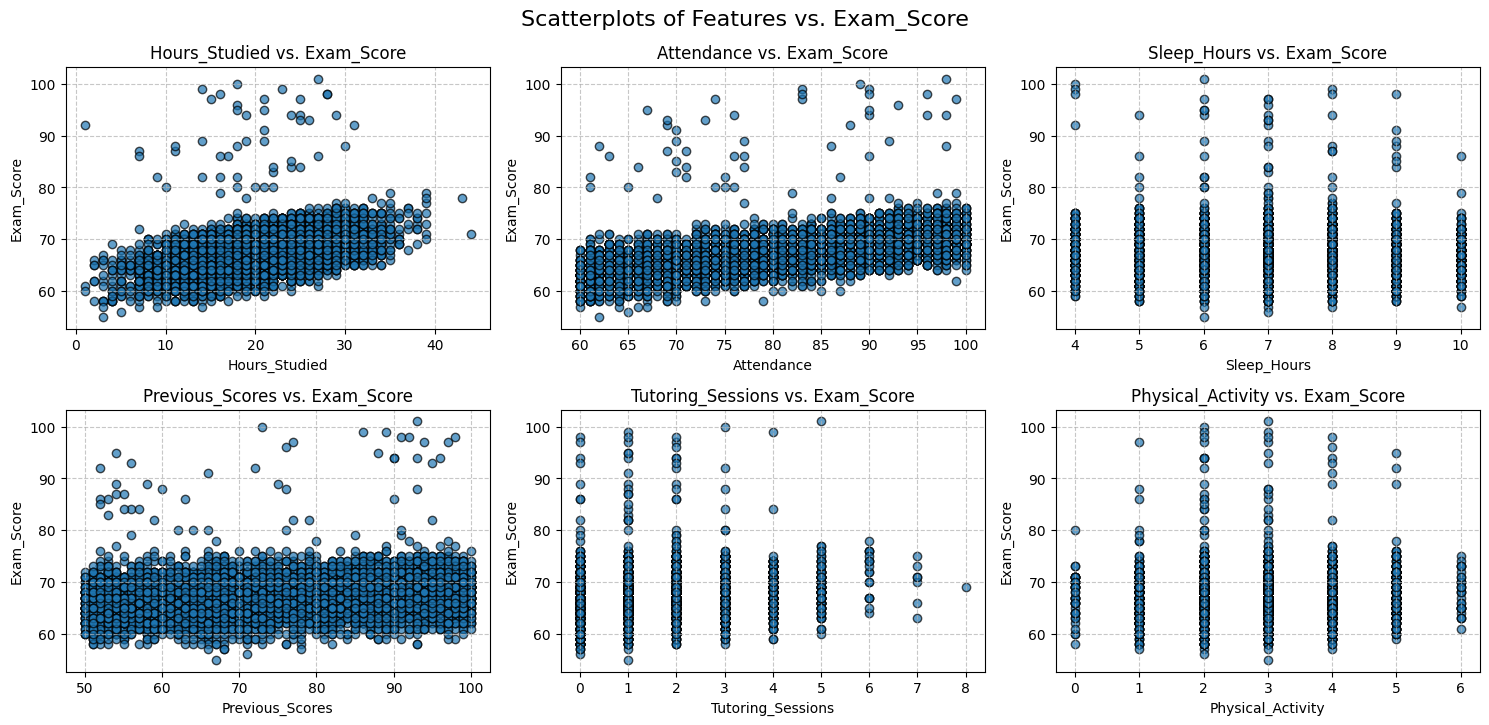

In [ ]:
import matplotlib.pyplot as plt

# Extract numeric columns
numeric_col = df[["Hours_Studied", "Attendance", "Sleep_Hours",
                  "Previous_Scores", "Tutoring_Sessions",
                  "Physical_Activity", "Exam_Score"]]

# Scatterplots for numeric features vs. Exam_Score
plt.figure(figsize=(15, 10))

# Loop through each numeric column except the target (Exam_Score)
for i, feature in enumerate(numeric_col.columns[:-1]):  # Exclude Exam_Score itself
    plt.subplot(3, 3, i + 1)  # Create a grid of 3x3 subplots
    plt.scatter(numeric_col[feature], numeric_col["Exam_Score"], alpha=0.7, edgecolor='black')
    plt.title(f"{feature} vs. Exam_Score", fontsize=12)
    plt.xlabel(feature)
    plt.ylabel("Exam_Score")
    plt.grid(visible=True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.suptitle('Scatterplots of Features vs. Exam_Score', fontsize=16, y=1.02)
plt.show()


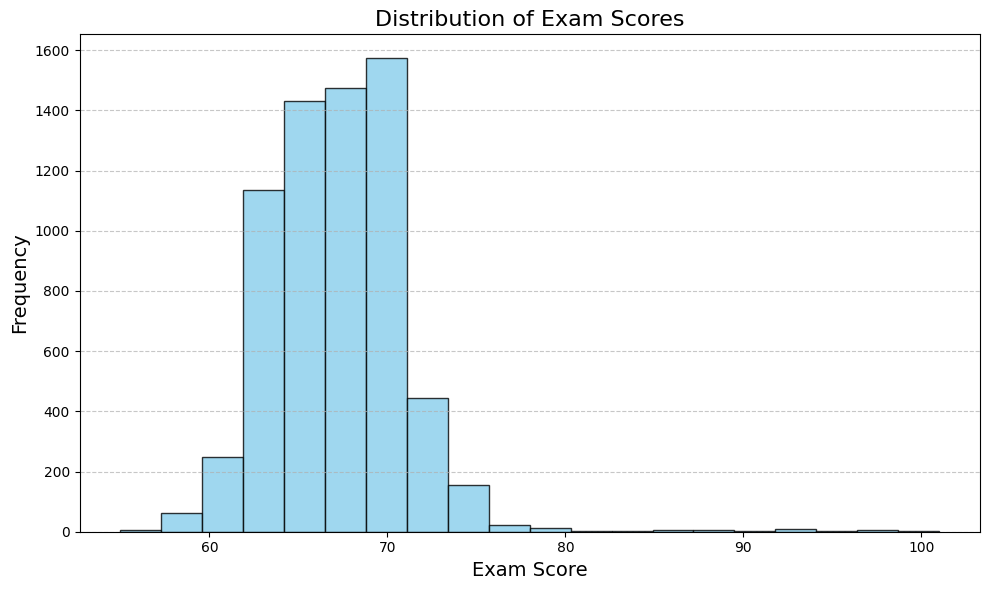

In [ ]:
import matplotlib.pyplot as plt

# Histogram for Exam_Score
plt.figure(figsize=(10, 6))
plt.hist(df["Exam_Score"], bins=20, color='skyblue', edgecolor='black', alpha=0.8)
plt.title("Distribution of Exam Scores", fontsize=16)
plt.xlabel("Exam Score", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


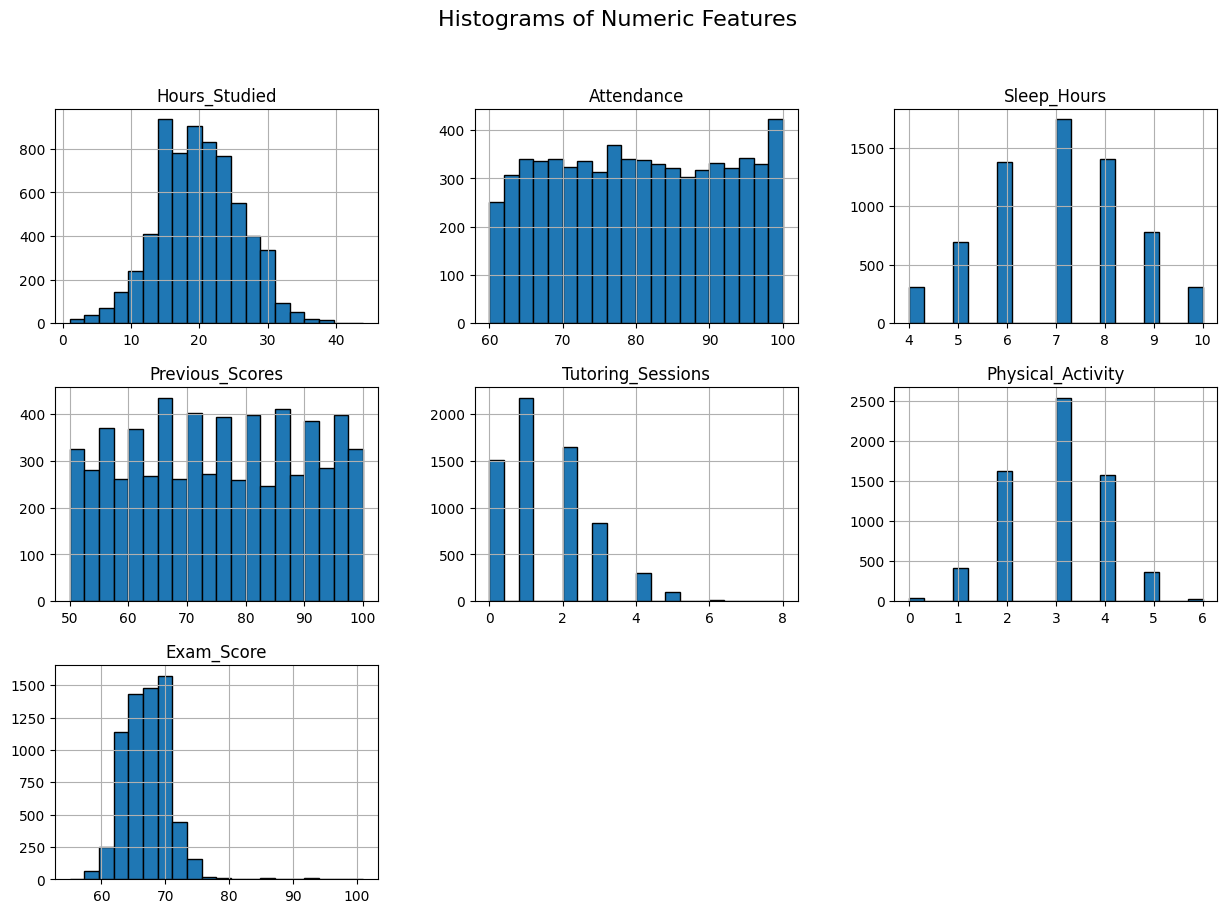

In [ ]:
#Extract numeric columns and visualize histograms
numeric_col = df[["Hours_Studied", "Attendance", "Sleep_Hours", "Previous_Scores", "Tutoring_Sessions", "Physical_Activity", "Exam_Score"]]

#We are interested in predicting Exam_Score and we plan to bin this feature into categorical ranges
numeric_col.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Numeric Features', fontsize=16)
plt.show()

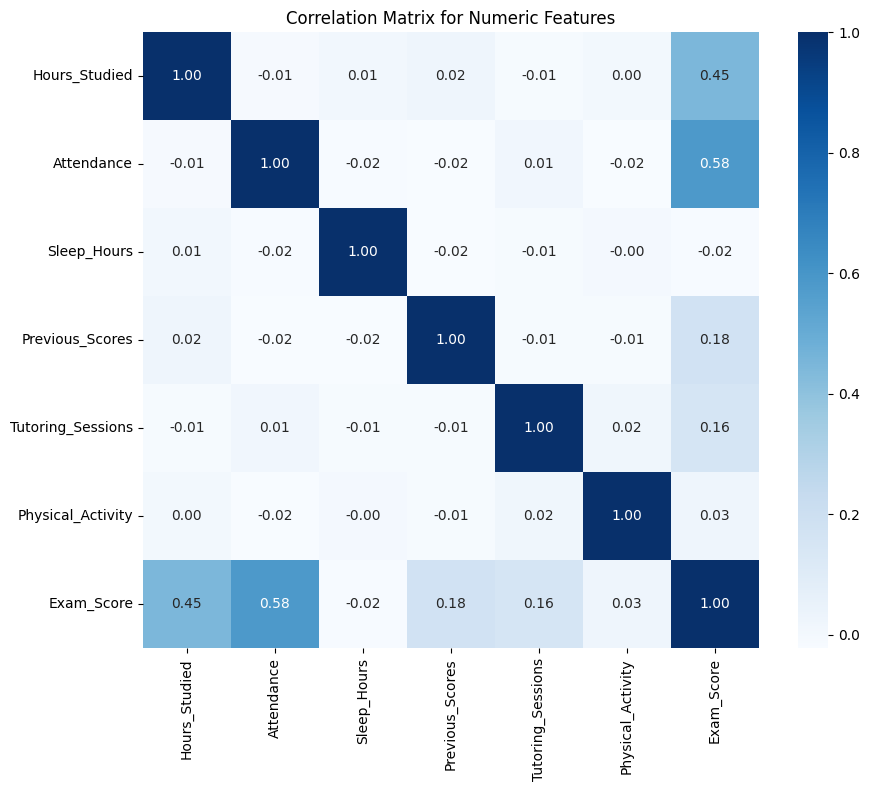

In [ ]:
#Compute the correlation matrix
corr_matrix = numeric_col.corr()

#Create a heatmap using Seaborn
#There does not appear to be risk of multicollinearity
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', cbar=True, square=True, fmt=".2f")
plt.title('Correlation Matrix for Numeric Features')
plt.show()

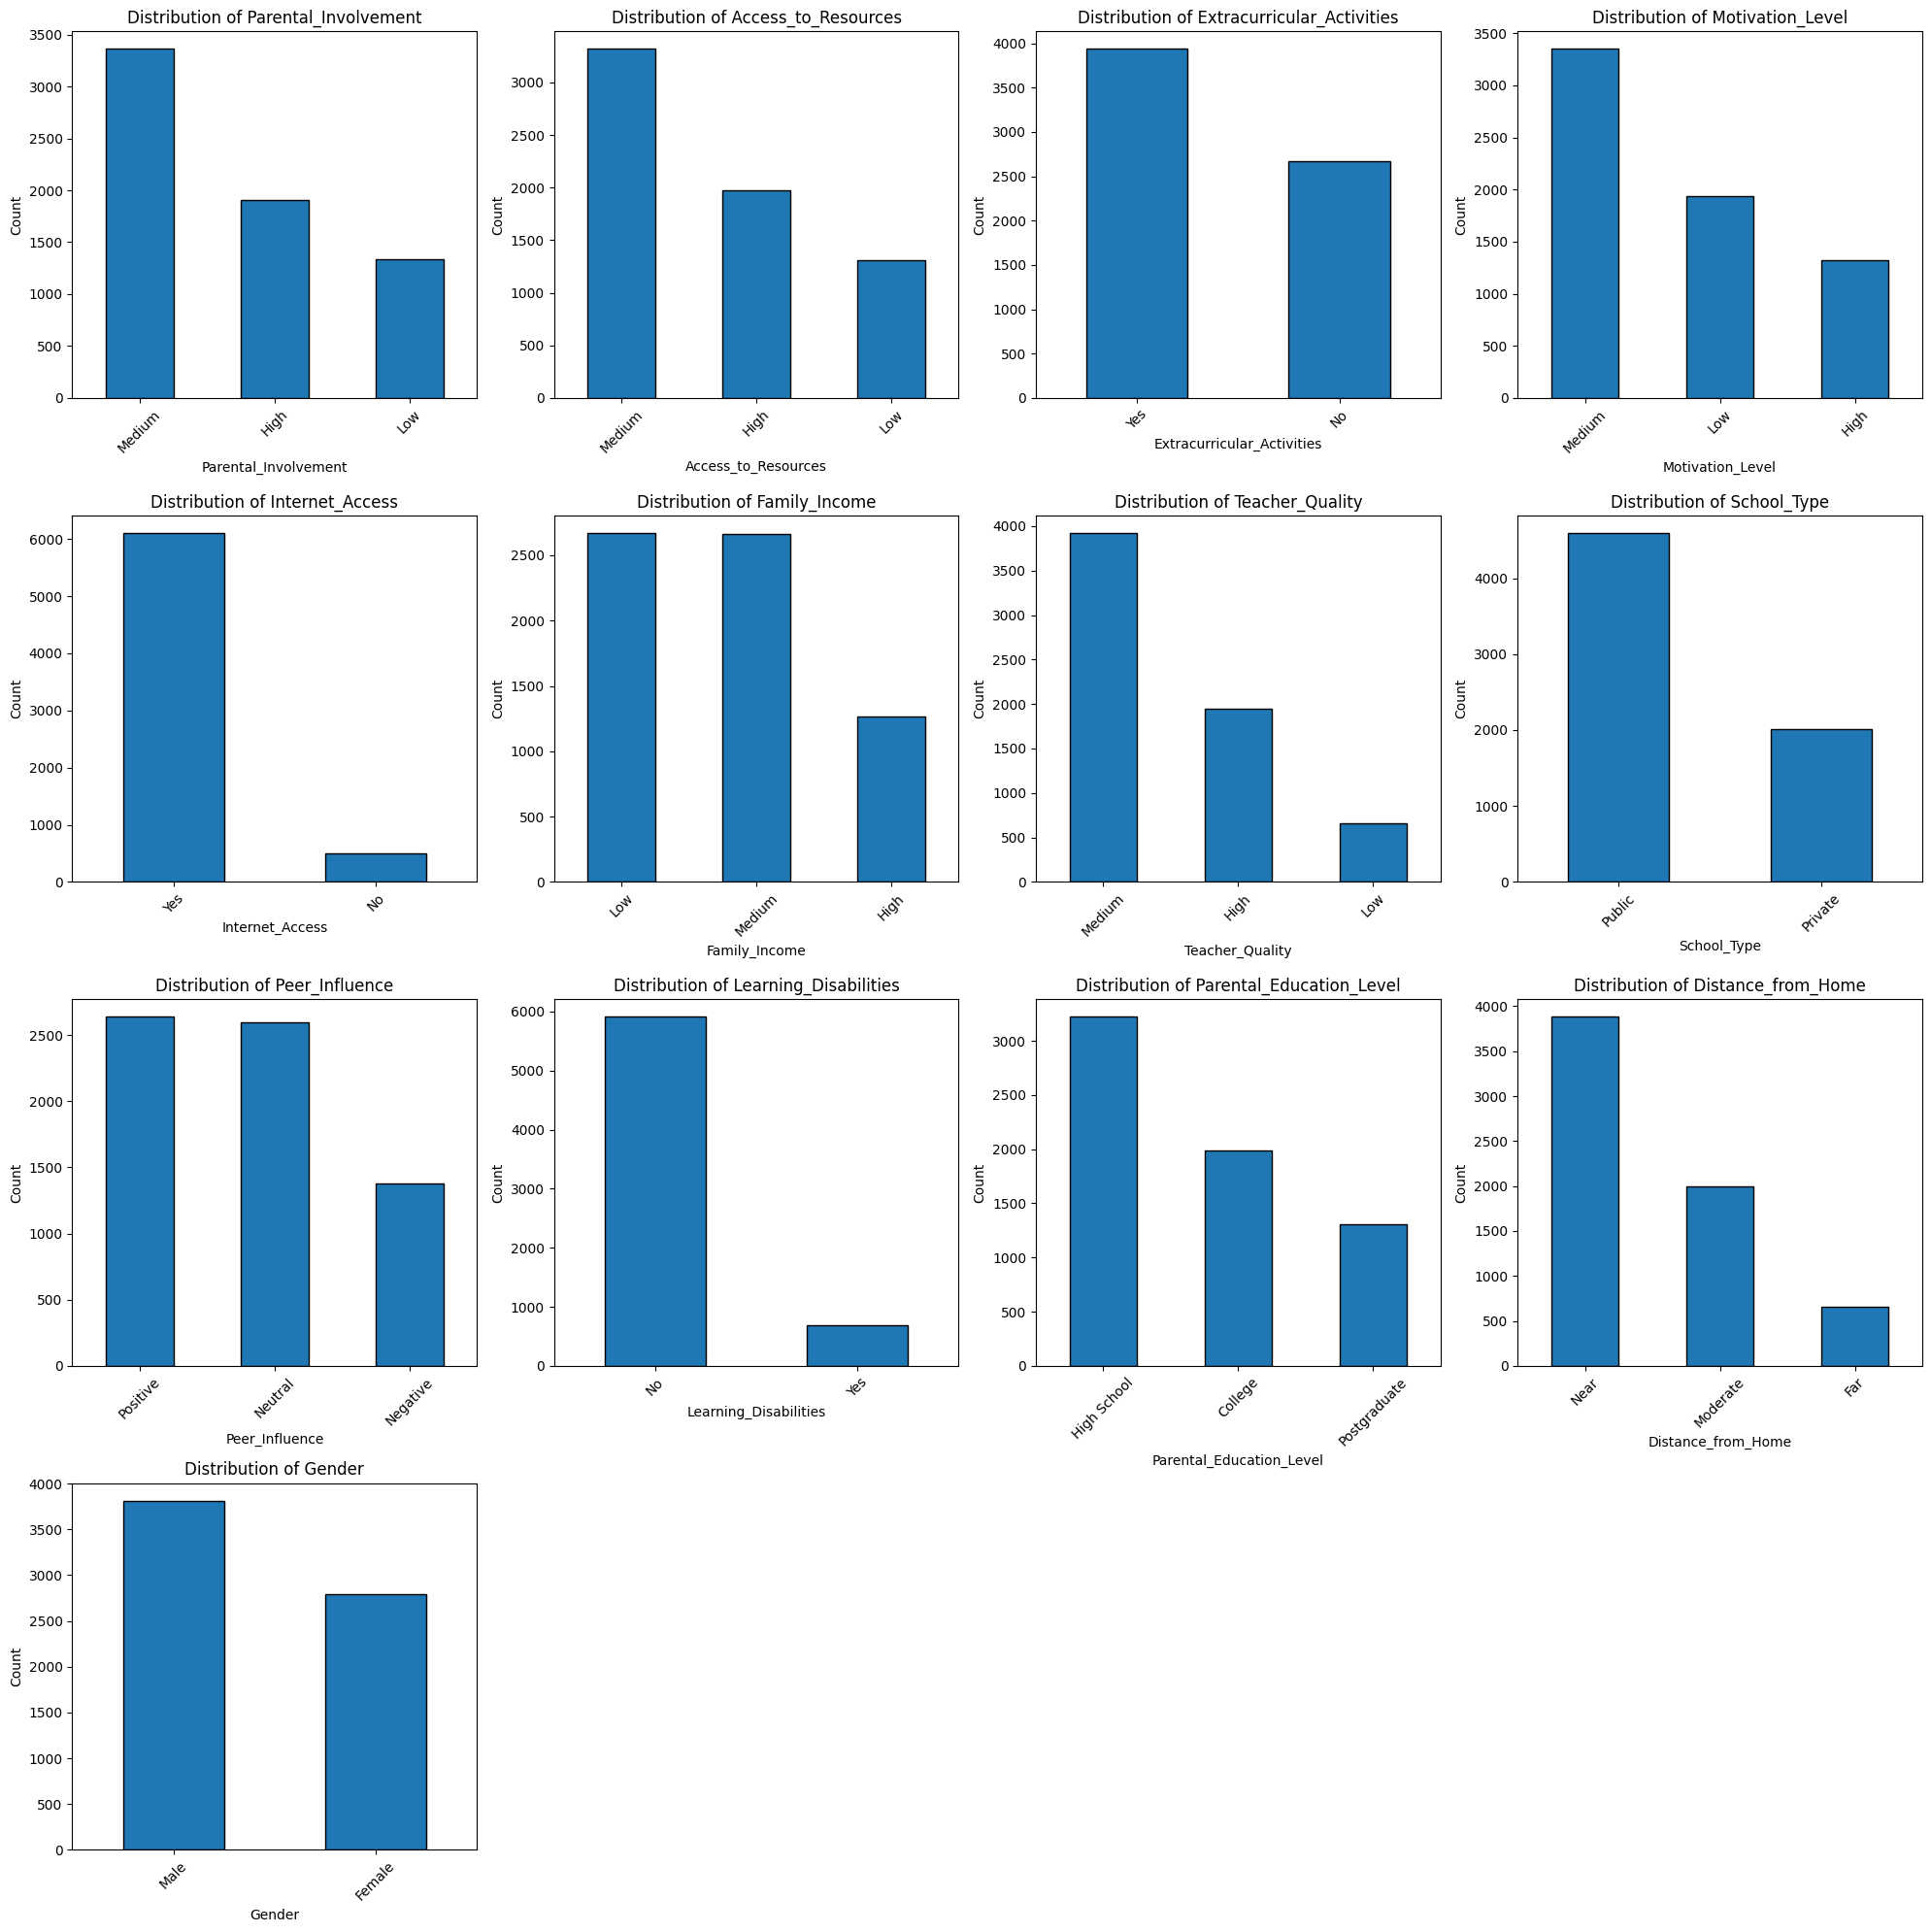

In [ ]:
#Extract categorical variables and plot bar graphs
cat_col = df[[
    "Parental_Involvement", "Access_to_Resources", "Extracurricular_Activities",
    "Motivation_Level", "Internet_Access", "Family_Income", "Teacher_Quality",
    "School_Type", "Peer_Influence", "Learning_Disabilities",
    "Parental_Education_Level", "Distance_from_Home", "Gender"
]]

#Set up a grid for subplots
num_plots = len(cat_col.columns)
#Calculate rows to fit 4 columns per row
nrows = (num_plots + 3) // 4
fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(20, 5 * nrows))
axes = axes.flatten()

#Create bar plots for each categorical feature
for i, column in enumerate(cat_col.columns):
    cat_col[column].value_counts().plot(
        kind='bar', ax=axes[i], edgecolor='black'
    )
    axes[i].set_title(f'Distribution of {column}', fontsize=12)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

#Hide any unused subplots
for i in range(num_plots, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## Part 2: Feature Engineering and Data Preprocessing

Data Preparation Steps
1. Map ordinal categorical features to numeric values
2. Create new features based on existing ones that seem relevant for our task
3. Remove irrelevant variables in predicting `Exam_Score`
4. Handle missing values
5. Scale the numeric features so they are standardized
6. Apply one-hot encoding for categorical features

CATEGORICAL PREDICTION TASK: <br>
7. Bin the `Exam_Score` field into roughly equal groupings

In [ ]:
#Define mapping dictionary
mapping = {"Low": 1, "Medium": 2, "High": 3}

#Apply the mapping to the columns that have natural ordering
df["Parental_Involvement_Mapped"] = df["Parental_Involvement"].map(mapping)
df["Access_to_Resources_Mapped"] = df["Access_to_Resources"].map(mapping)
df["Motivation_Level_Mapped"] = df["Motivation_Level"].map(mapping)
df["Family_Income_Mapped"] = df["Family_Income"].map(mapping)
df["Teacher_Quality_Mapped"] = df["Teacher_Quality"].map(mapping)

#Define distance mapping dictionary
distance_mapping = {"Near": 1, "Moderate": 2, "Far": 3}
#Apply mapping to ordered distance column
df["Distance_from_Home_Mapped"] = df["Distance_from_Home"].map(distance_mapping)

#Define education mapping
education_mapping = {"High School": 1, "College": 2, "Postgraduate": 3}
#Apply the mapping to the education column
df["Parental_Education_Level_Mapped"] = df["Parental_Education_Level"].map(education_mapping)

In [ ]:
#Feature engineering, create new features based on existing ones
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score', 'Parental_Involvement_Mapped',
       'Access_to_Resources_Mapped', 'Motivation_Level_Mapped',
       'Family_Income_Mapped', 'Teacher_Quality_Mapped',
       'Distance_from_Home_Mapped', 'Parental_Education_Level_Mapped'],
      dtype='object')

In [ ]:
#Create relevant interactions terms
#Interaction between hours studied and class attendance
df["Class_Engagement"] = df["Hours_Studied"] * df["Attendance"]

#Interaction between parental involvement and access to resources
df["Home_Support"] = df["Parental_Involvement_Mapped"] * df["Access_to_Resources_Mapped"]

#Interaction between motivation level and tutoring sessions
df["Learning_Engagement"] = df["Motivation_Level_Mapped"] * df["Tutoring_Sessions"]

In [ ]:
#Ratio of hours studied to sleep
df["Study_Sleep_Ratio"] = df["Hours_Studied"] / df["Sleep_Hours"]

In [ ]:
#Balance of physical activity and sleep levels
df["Health_Balance"] = df["Physical_Activity"] + df["Sleep_Hours"]

In [ ]:
#Remove variables
df = df.drop(columns = ["Parental_Involvement", "Access_to_Resources",
                        "Motivation_Level", "Family_Income", "Teacher_Quality",
                       "Distance_from_Home", "Parental_Education_Level"])

In [ ]:
#Handle missing values
#Selecting the categorical fields for imputation
cat_fields = ["Parental_Education_Level_Mapped", "Teacher_Quality_Mapped", "Distance_from_Home_Mapped"]

#Impute categorical columns with mode
for col in cat_fields:
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
#No missing values now
df.isna().sum()

,0
Hours_Studied,0
Attendance,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Internet_Access,0
Tutoring_Sessions,0
School_Type,0
Peer_Influence,0
Physical_Activity,0


In [ ]:
#Standardize numeric features
#List of numeric features
numeric_features = ["Hours_Studied", "Attendance", "Sleep_Hours", "Previous_Scores",
                   "Tutoring_Sessions", "Physical_Activity", "Class_Engagement",
                   "Home_Support", "Learning_Engagement", "Study_Sleep_Ratio",
                   "Health_Balance"]

#Standardize the numeric features including the outcome variable
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [ ]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Extracurricular_Activities',
       'Sleep_Hours', 'Previous_Scores', 'Internet_Access',
       'Tutoring_Sessions', 'School_Type', 'Peer_Influence',
       'Physical_Activity', 'Learning_Disabilities', 'Gender', 'Exam_Score',
       'Parental_Involvement_Mapped', 'Access_to_Resources_Mapped',
       'Motivation_Level_Mapped', 'Family_Income_Mapped',
       'Teacher_Quality_Mapped', 'Distance_from_Home_Mapped',
       'Parental_Education_Level_Mapped', 'Class_Engagement', 'Home_Support',
       'Learning_Engagement', 'Study_Sleep_Ratio', 'Health_Balance'],
      dtype='object')

In [ ]:
#Apply one-hot encoding for remaining categorical features
categorical_columns = ["Extracurricular_Activities", "Internet_Access",
                      "School_Type", "Peer_Influence", "Learning_Disabilities",
                      "Gender"]
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True, dtype = int)

In [ ]:
#Move "Exam_Score" to the last column
columns = [col for col in df.columns if col != "Exam_Score"]
columns.append("Exam_Score")
df = df[columns]

## Bin Exam_Score Only for Categorical Prediction Task

In [ ]:
#Define quantile-based bins and labels
quantile_bins = [0, 0.25, 0.5, 0.75, 1]
labels = ["Low", "Average", "Good", "Excellent"]

#Create a new column with quantile-based binned scores
df["Exam_Score_Binned"] = pd.qcut(df["Exam_Score"], q=4, labels=labels)


In [ ]:
#Creates roughly even bins using percentiles
df["Exam_Score_Binned"].value_counts()

,count
Exam_Score_Binned,
Low,2131
Excellent,1625
Average,1468
Good,1383


In [ ]:
from tabulate import tabulate

# Assuming Exam_Score_Binned is already defined in your DataFrame
# Create a value counts DataFrame for display
value_counts_df = df["Exam_Score_Binned"].value_counts().reset_index()
value_counts_df.columns = ["Bin", "Count"]

# Print the table using a fancy grid
print(tabulate(value_counts_df, headers="keys", tablefmt="fancy_grid"))


╒════╤═══════════╤═════════╕
│    │ Bin       │   Count │
╞════╪═══════════╪═════════╡
│  0 │ Low       │    2131 │
├────┼───────────┼─────────┤
│  1 │ Excellent │    1625 │
├────┼───────────┼─────────┤
│  2 │ Average   │    1468 │
├────┼───────────┼─────────┤
│  3 │ Good      │    1383 │
╘════╧═══════════╧═════════╛


In [ ]:
#Define exam score bin mapping dictionary
mapping = {"Low": 0, "Average": 1, "Good": 2, "Excellent": 3}

#Apply the mapping to the target
df["Exam_Score_Binned"] = df["Exam_Score_Binned"].map(mapping).astype(int)

## Part 3: Create train/test split

In [ ]:
#Regression task train/test split
X_reg = df.drop(columns = ["Exam_Score", "Exam_Score_Binned"])
y_reg = df["Exam_Score"]

#Perform an 80/20 train-test split
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


In [ ]:
#Categorical task train/test split
X_ct = df.drop(columns = ["Exam_Score", "Exam_Score_Binned"])
y_ct = df["Exam_Score_Binned"]

#Perform an 80/20 train-test split
X_ct_train, X_ct_test, y_ct_train, y_ct_test = train_test_split(X_ct, y_ct, stratify = y_ct, test_size=0.2, random_state=42)


## Part 4: Model Development (Student Performance Regression)

## Part 4a: Base Models (No Hyperparameter Tuning)

In [ ]:
#List to store all models
models_reg = []

#Linear Regression
lr = LinearRegression()
lr.fit(X_reg_train, y_reg_train)
models_reg.append(("Base Linear Regression", lr))


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Add a constant to the features for the intercept term
X_reg_train_const = sm.add_constant(X_reg_train)

# Fit a statsmodels OLS model for detailed regression statistics
ols_model = sm.OLS(y_reg_train, X_reg_train_const).fit()

# Create a DataFrame with coefficients, p-values, confidence intervals, and significance
summary_df = pd.DataFrame({
    "Variable": ols_model.params.index,
    "Coefficient": ols_model.params.values,
    "P-Value": ols_model.pvalues.values,
    "Significant at 0.05": ["Yes" if p < 0.05 else "No" for p in ols_model.pvalues.values],
    "CI Lower Bound": ols_model.conf_int().iloc[:, 0].values,
    "CI Upper Bound": ols_model.conf_int().iloc[:, 1].values
})

# Sort the DataFrame by p-value in ascending order
summary_df = summary_df.sort_values(by="P-Value", ascending=True)

# Display the summary DataFrame
#summary_df

from tabulate import tabulate

# Print the DataFrame in a pretty table format
print(tabulate(summary_df, headers="keys", tablefmt="fancy_grid"))
##


╒════╤═════════════════════════════════╤═══════════════╤══════════════╤═══════════════════════╤══════════════════╤══════════════════╕
│    │ Variable                        │   Coefficient │      P-Value │ Significant at 0.05   │   CI Lower Bound │   CI Upper Bound │
╞════╪═════════════════════════════════╪═══════════════╪══════════════╪═══════════════════════╪══════════════════╪══════════════════╡
│  0 │ const                           │    58.3113    │ 0            │ Yes                   │       57.1511    │       59.4716    │
├────┼─────────────────────────────────┼───────────────┼──────────────┼───────────────────────┼──────────────────┼──────────────────┤
│  4 │ Previous_Scores                 │     0.706846  │ 6.43392e-126 │ Yes                   │        0.650358  │        0.763333  │
├────┼─────────────────────────────────┼───────────────┼──────────────┼───────────────────────┼──────────────────┼──────────────────┤
│  2 │ Attendance                      │     2.14423   │ 3.775

In [ ]:
#Regression Tree (CART)
reg_cart = DecisionTreeRegressor(random_state=42)
reg_cart.fit(X_reg_train, y_reg_train)
models_reg.append(("Base Regression Tree (CART)", reg_cart))

In [ ]:
#Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_reg_train, y_reg_train)
models_reg.append(("Base Random Forest", rf))

In [ ]:
#XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_reg_train, y_reg_train)
models_reg.append(("Base XGBoost", xgb))

In [ ]:
#Baseline Neural Network
def baseline_model():
    input_dim = X_reg_train.shape[1]  # Number of input features
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))  #Hidden layer 1
    model.add(Dense(32, activation='relu'))                      #Hidden layer 2
    model.add(Dense(1, activation='linear'))                     #Output layer
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
    return model

#Wrap the model with KerasRegressor
base_estimator = KerasRegressor(model=baseline_model, epochs=100, batch_size=32, verbose=1)

#Train the model
base_estimator.fit(X_reg_train, y_reg_train)

#Make predictions
base_nn_pred = base_estimator.predict(X_reg_test)

models_reg.append(("Baseline Neural Network (Keras)", base_estimator))

Epoch 1/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 2843.5918 - mse: 2843.5918
Epoch 2/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 40.4633 - mse: 40.4633
Epoch 3/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 34.2489 - mse: 34.2489
Epoch 4/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25.1398 - mse: 25.1398
Epoch 5/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.2998 - mse: 18.2998
Epoch 6/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13.5259 - mse: 13.5259
Epoch 7/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.9482 - mse: 11.9482
Epoch 8/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.4441 - mse: 10.4441
Epoch 9/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.1053 - mse: 8.1053
Epoch 10/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.9240 - mse: 6.9240
Epoch 11/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.2014 - mse: 7.2014
Epoch 12/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.9502 - mse: 

## Part 4b: Models with Hyperparameter Tuning

In [ ]:
models_reg_ht = []

In [ ]:
#RandomSearchCV to try various Linear Regression Parameters
param_space = {'copy_X': [True,False],
               'fit_intercept': [True,False],
               'n_jobs': [1,5,10,15,None],
               'positive': [True,False]}
lr = LinearRegression()
lr_random_search = RandomizedSearchCV(lr, param_space, n_iter=100, cv=5)
lr_random_search.fit(X_reg_train, y_reg_train)

# Parameter which gives the best results
print(f"Best Hyperparameters: {lr_random_search.best_params_}")

# Accuracy of the model after using best parameters
print(f"Best Score: {lr_random_search.best_score_}")

lr_random_search_best_model = lr_random_search.best_estimator_
lr_random_search_pred = lr_random_search_best_model.predict(X_reg_test)

models_reg_ht.append(("Random Search CV Linear Regression", lr_random_search_best_model))



Best Hyperparameters: {'positive': False, 'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}
Best Score: 0.7233498634258309


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

# Use Linear Regression for feature selection
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=5)  # Select top 5 features
rfe.fit(X_reg_train, y_reg_train)

# Get selected features
selected_features = rfe.support_  #Boolean mask of selected features
ranking = rfe.ranking_  #Feature ranking (1 means selected)

print("Selected Features (Boolean Mask):", selected_features)
print("Feature Rankings:", ranking)

models_reg_ht.append(("Linear Recursive Feature Elimination", rfe))


Selected Features (Boolean Mask): [ True  True False False False False  True  True False False False False
 False False False False False False False  True False False False False
 False]
Feature Rankings: [ 1  1  5  3  8  4  1  1 13 11 12 15 14 16 17 18 21  6  9  1 20 10  7  2
 19]


In [ ]:
#Lasso L1-regularization
param_dist = {'alpha': [0.1, 1.0, 10.0, 100.0]}
lasso = Lasso()
lr_lasso = RandomizedSearchCV(lasso, param_dist, n_iter=10, cv=5)
lr_lasso.fit(X_reg_train, y_reg_train)

print(f"Best Hyperparameters: {lr_lasso.best_params_}")
print(f"Best Score: {lr_lasso.best_score_}")

lr_lasso_best_model = lr_lasso.best_estimator_
lr_lasso_pred = lr_lasso_best_model.predict(X_reg_test)

feature_names = X_reg_train.columns
coefficients = lr_lasso_best_model.coef_

#Print selected features
selected_features = feature_names[coefficients != 0]
print("Selected Features:")
print(selected_features)

models_reg_ht.append(("Lasso Regression (L1)", lr_lasso_best_model))

Best Hyperparameters: {'alpha': 0.1}
Best Score: 0.6898226230239183
Selected Features:
Index(['Attendance', 'Previous_Scores', 'Tutoring_Sessions',
       'Physical_Activity', 'Motivation_Level_Mapped', 'Family_Income_Mapped',
       'Teacher_Quality_Mapped', 'Distance_from_Home_Mapped',
       'Parental_Education_Level_Mapped', 'Class_Engagement', 'Home_Support',
       'Learning_Engagement', 'Extracurricular_Activities_Yes',
       'Peer_Influence_Positive'],
      dtype='object')


In [ ]:
#Ridge L2-Regularization
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
ridge = Ridge()
lr_ridge = GridSearchCV(ridge, param_grid, cv=5)
lr_ridge.fit(X_reg_train, y_reg_train)

print(f"Best Hyperparameters: {lr_ridge.best_params_}")
print(f"Best Score: {lr_ridge.best_score_}")

lr_ridge_best_model = lr_ridge.best_estimator_
lr_ridge_pred = lr_ridge_best_model.predict(X_reg_test)

models_reg_ht.append(("Ridge Regression (L2)", lr_ridge_best_model))

Best Hyperparameters: {'alpha': 1.0}
Best Score: 0.7233717620748458


In [ ]:
#L0L1 regularization
#fit_model = l0learn.fit(X_reg_train.to_numpy(), y_reg_train.to_numpy(dtype=np.float64), penalty="L0L1", max_support_size=20)

#Store the best model for further use
#models_reg_ht.append(("L0L1Learn", fit_model))

In [ ]:
#L0L2 regularization
#fit_model = l0learn.fit(X_reg_train.to_numpy(), y_reg_train.to_numpy(dtype=np.float64), penalty="L0L2", max_support_size=20)

# Store the best model for further use
#models_reg_ht.append(("L0L2Learn", fit_model))

In [ ]:
#Elastic Net L1-L2 Regularization
elastic_net = ElasticNet()

param_dist_elastic = {
    'alpha': [0.1, 1.0, 10.0, 100.0],  # Regularization strength
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]  # Mix of L1/L2 regularization
}

lr_elastic_net = RandomizedSearchCV(
    elastic_net, param_dist_elastic, n_iter=20, cv=5, random_state=42, scoring='r2'
)

# Fit on training data
lr_elastic_net.fit(X_reg_train, y_reg_train)

# Best parameters and score
print(f"Best Hyperparameters: {lr_elastic_net.best_params_}")
print(f"Best Cross-Validation R² Score: {lr_elastic_net.best_score_}")

# Use the best model for predictions
lr_elastic_net_best = lr_elastic_net.best_estimator_
lr_elastic_pred = lr_elastic_net_best.predict(X_reg_test)

models_reg_ht.append(("Elastic Net Regression (L1-L2)", lr_elastic_net_best))


Best Hyperparameters: {'l1_ratio': 0.1, 'alpha': 0.1}
Best Cross-Validation R² Score: 0.7119894382384917


In [ ]:
#ElasticNet (Bayes Optimization)

#Define the function to optimize
def elasticnet_cv(alpha, l1_ratio):
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
    cval = cross_val_score(model, X_reg_train, y_reg_train, scoring='neg_mean_squared_error', cv=5)
    return cval.mean()

#Define the parameter bounds
param_bounds = {
    'alpha': (1e-3, 100),  # Regularization strength bounds
    'l1_ratio': (0.1, 1.0)  # Lasso-Ridge balance (0.1 = mostly Ridge, 1.0 = pure Lasso)
}

#Initialize Bayesian Optimizer
optimizer = BayesianOptimization(
    f=elasticnet_cv,
    pbounds=param_bounds,
    random_state=42,
)

#Run optimization
optimizer.maximize(init_points=5, n_iter=25)

#Extract the best parameters
best_params = optimizer.max['params']
print(f"Best alpha: {best_params['alpha']}")
print(f"Best l1_ratio: {best_params['l1_ratio']}")
print(f"Best cross-validation score: {optimizer.max['target']}")

best_lr_elasticnet = ElasticNet(
    alpha=best_params['alpha'],
    l1_ratio=best_params['l1_ratio'],
    random_state=42
)
best_lr_elasticnet.fit(X_reg_train, y_reg_train)

models_reg_ht.append(("ElasticNet (Bayes Optimization)", best_lr_elasticnet))


|   iter    |  target   |   alpha   | l1_ratio  |
-------------------------------------------------
| 1         | -15.39    | 37.45     | 0.9556    |
| 2         | -15.39    | 73.2      | 0.6388    |
| 3         | -15.39    | 15.6      | 0.2404    |
| 4         | -15.39    | 5.809     | 0.8796    |
| 5         | -15.39    | 60.11     | 0.7373    |
| 6         | -15.39    | 99.97     | 0.997     |
| 7         | -15.39    | 82.84     | 0.3702    |
| 8         | -15.39    | 10.14     | 0.5695    |
| 9         | -15.39    | 99.98     | 0.8997    |
| 10        | -4.399    | 0.003935  | 0.5136    |
| 11        | -7.678    | 1.328     | 0.1509    |
| 12        | -4.901    | 0.09937   | 0.9747    |
| 13        | -15.39    | 48.69     | 0.1423    |
| 14        | -15.39    | 26.57     | 0.113     |
| 15        | -15.39    | 91.55     | 0.1207    |
| 16        | -4.434    | 0.02646   | 0.1977    |
| 17        | -15.39    | 66.7      | 0.1043    |
| 18        | -4.401    | 0.002461  | 0.1128    |


Top Features by ElasticNet (Bayes Optimization):
                           Feature  Importance  Absolute Importance
1                       Attendance    2.058075             2.058075
0                    Hours_Studied    1.242953             1.242953
22         Peer_Influence_Positive    1.008409             1.008409
19             Internet_Access_Yes    0.902204             0.902204
7       Access_to_Resources_Mapped    0.844716             0.844716
23       Learning_Disabilities_Yes   -0.820583             0.820583
6      Parental_Involvement_Mapped    0.802661             0.802661
3                  Previous_Scores    0.702606             0.702606
4                Tutoring_Sessions    0.622382             0.622382
18  Extracurricular_Activities_Yes    0.565755             0.565755


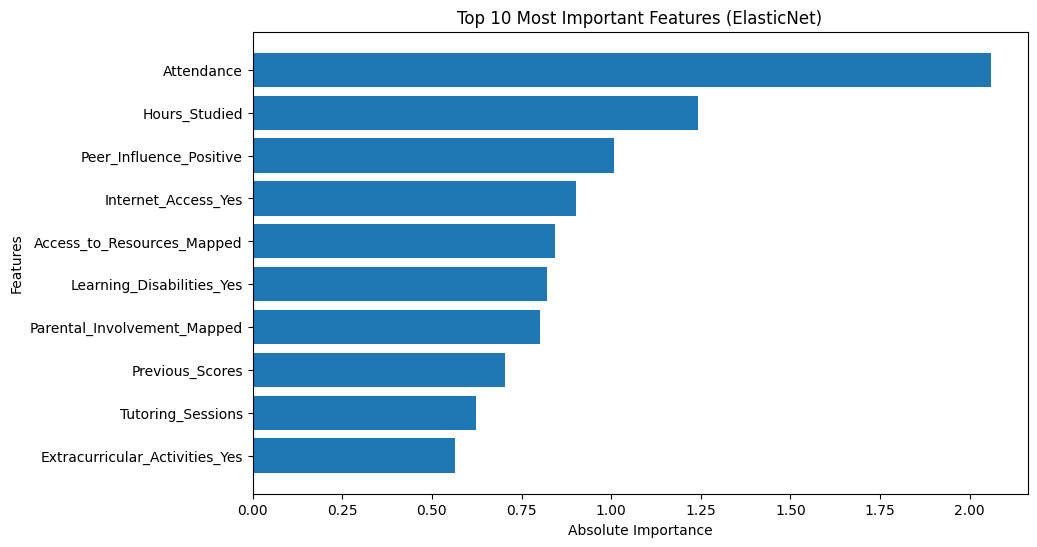

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd

# Get feature importance from the ElasticNet model (coefficients)
feature_importances = best_lr_elasticnet.coef_

# Create a DataFrame to display feature names with their corresponding coefficients
feature_importance_df = pd.DataFrame({
    'Feature': X_reg_train.columns if hasattr(X_reg_train, 'columns') else [f'Feature_{i}' for i in range(X_reg_train.shape[1])],
    'Importance': feature_importances
})

# Sort by absolute importance values in descending order
feature_importance_df['Absolute Importance'] = np.abs(feature_importance_df['Importance'])
feature_importance_df = feature_importance_df.sort_values(by='Absolute Importance', ascending=False)

# Display the most important features
print("Top Features by ElasticNet (Bayes Optimization):")
print(feature_importance_df.head(10))

# Optional: Plot the top 10 features
import matplotlib.pyplot as plt

top_features = feature_importance_df.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Absolute Importance'])
plt.xlabel('Absolute Importance')
plt.ylabel('Features')
plt.title('Top 10 Most Important Features (ElasticNet)')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()


In [ ]:
# Find the number of features retained by ElasticNet
non_zero_coefficients = np.sum(best_lr_elasticnet.coef_ != 0)

print(f"Number of features retained by ElasticNet: {non_zero_coefficients}")


Number of features retained by ElasticNet: 22


In [ ]:
#CART Regularization
#Grid Search
params_cart = {
    'criterion': ['squared_error', 'absolute_error', 'poisson'],
    #'splitter': ['best', 'random'],
    'max_depth': [1, 5, 10, 20],
    #'max_features': ['sqrt', 'log2'],
    #'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
}
reg_cart = DecisionTreeRegressor(random_state=42)
cart_grid_search = GridSearchCV(reg_cart, params_cart, cv=5, n_jobs=-1,
    verbose=2)
cart_grid_search.fit(X_reg_train, y_reg_train)

#Best parameters and score
print(f"Best Hyperparameters: {cart_grid_search.best_params_}")
print(f"Best OOS R² Score: {cart_grid_search.best_score_}")

#Use the best model for predictions
best_cart_grid_search = cart_grid_search.best_estimator_
cart_grid_pred = best_cart_grid_search.predict(X_reg_test)

models_reg_ht.append(("CART Hyperparameter Tuned", best_cart_grid_search))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'criterion': 'absolute_error', 'max_depth': 20, 'min_samples_leaf': 10}
Best OOS R² Score: 0.5756819317162278


In [ ]:
#Random Forest Regularization
#Grid Search
param_grid = {
	'n_estimators': [50, 100, 150],
	'max_features': ['sqrt', 'log2', None],
	'max_depth': [3, 6, 9],
	'max_leaf_nodes': [3, 6, 9],
}
rf_grid_search = GridSearchCV(RandomForestRegressor(),
                           param_grid=param_grid, n_jobs=-1,
    verbose=2)
rf_grid_search.fit(X_reg_train, y_reg_train)
print(f"Best Hyperparameters: {rf_grid_search.best_params_}")
print(f"Best OOS Score: {rf_grid_search.best_score_}")

best_rf_grid_search = rf_grid_search.best_estimator_
rf_grid_pred = best_rf_grid_search.predict(X_reg_test)

models_reg_ht.append(("Random Forest Hyperparameter Tuned", best_rf_grid_search))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'max_depth': 9, 'max_features': None, 'max_leaf_nodes': 9, 'n_estimators': 100}
Best OOS Score: 0.5148492881109556


In [ ]:
# Parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 150],  # Number of trees
    'max_depth': [3, 6, 9],  # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.2],  # eta: shrinkage rate
}

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(use_label_encoder=False, eval_metric='logloss')

# Perform Grid Search
xgb_grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    n_jobs=-1,
    cv=5,
    verbose=2
)

# Fit the model
xgb_grid_search.fit(X_reg_train, y_reg_train)

# Output the best hyperparameters and score
print(f"Best Hyperparameters: {xgb_grid_search.best_params_}")
print(f"Best OOS Score: {xgb_grid_search.best_score_}")

# Use the best estimator to make predictions
best_xgb_model = xgb_grid_search.best_estimator_
xgb_pred = best_xgb_model.predict(X_reg_test)

# Append the model to the list
models_reg_ht.append(("XGBoost Hyperparameter Tuned", best_xgb_model))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
Best OOS Score: 0.6931639313697815


## Part 5: Evaluate Results (Regression)

In [ ]:
def evaluate_models(models_reg, X_train, X_test, y_train, y_test):
    """
    Evaluates regression models (both scikit-learn and custom models) and outputs a table of in-sample and out-of-sample metrics.

    Args:
        models_reg (list): List of tuples containing model names and model objects.
        X_train (pd.DataFrame or np.ndarray): Training feature matrix.
        X_test (pd.DataFrame or np.ndarray): Testing feature matrix.
        y_train (pd.Series or np.ndarray): Training target values.
        y_test (pd.Series or np.ndarray): Testing target values.

    Returns:
        pd.DataFrame: Table of in-sample and out-of-sample metrics (R-squared, MSE, MAE).
    """
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    import numpy as np
    import pandas as pd

    results = []

    for name, model in models_reg:
        try:
            # Predict for scikit-learn or models with `predict` method
            if hasattr(model, "predict"):
                y_train_pred = model.predict(X_train)
                y_test_pred = model.predict(X_test)

            # Predict for PyTorch, TensorFlow, or other neural network models
            elif hasattr(model, "forward") or hasattr(model, "fit"):
                model.eval()  # Set to evaluation mode if applicable (PyTorch)
                with torch.no_grad():  # Use no-grad for PyTorch-like frameworks
                    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
                    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
                    y_train_pred = model(X_train_tensor).numpy()
                    y_test_pred = model(X_test_tensor).numpy()

            else:
                raise ValueError(f"Model {name} does not have a compatible prediction method.")

            # Compute metrics
            metrics = {
                "Model": name,
                "R-squared (In-Sample)": r2_score(y_train, y_train_pred),
                "R-squared (Out-of-Sample)": r2_score(y_test, y_test_pred),
                "MSE (In-Sample)": mean_squared_error(y_train, y_train_pred),
                "MSE (Out-of-Sample)": mean_squared_error(y_test, y_test_pred),
                "MAE (In-Sample)": mean_absolute_error(y_train, y_train_pred),
                "MAE (Out-of-Sample)": mean_absolute_error(y_test, y_test_pred),
            }
            results.append(metrics)

        except Exception as e:
            print(f"Error evaluating model {name}: {e}")

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)

    # Sort the DataFrame by out-of-sample R-squared (descending) for easy comparison
    results_df.sort_values(by="R-squared (Out-of-Sample)", ascending=False, inplace=True)

    return results_df


In [ ]:
#Baseline model results
baseline_results = evaluate_models(models_reg, X_reg_train, X_reg_test, y_reg_train, y_reg_test)
baseline_results

166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step


,Model,R-squared (In-Sample),R-squared (Out-of-Sample),MSE (In-Sample),MSE (Out-of-Sample),MAE (In-Sample),MAE (Out-of-Sample)
0,Base Linear Regression,0.717146,0.771082,4.350564,3.235778,0.496815,0.448112
4,Baseline Neural Network (Keras),0.741543,0.737846,3.975320,3.705561,0.699043,0.712606
3,Base XGBoost,0.929689,0.708601,1.081455,4.118949,0.439171,0.783405
2,Base Random Forest,0.948177,0.685629,0.797093,4.443650,0.413205,1.008797
1,Base Regression Tree (CART),1.000000,0.113695,0.000000,12.527988,0.000000,1.691377


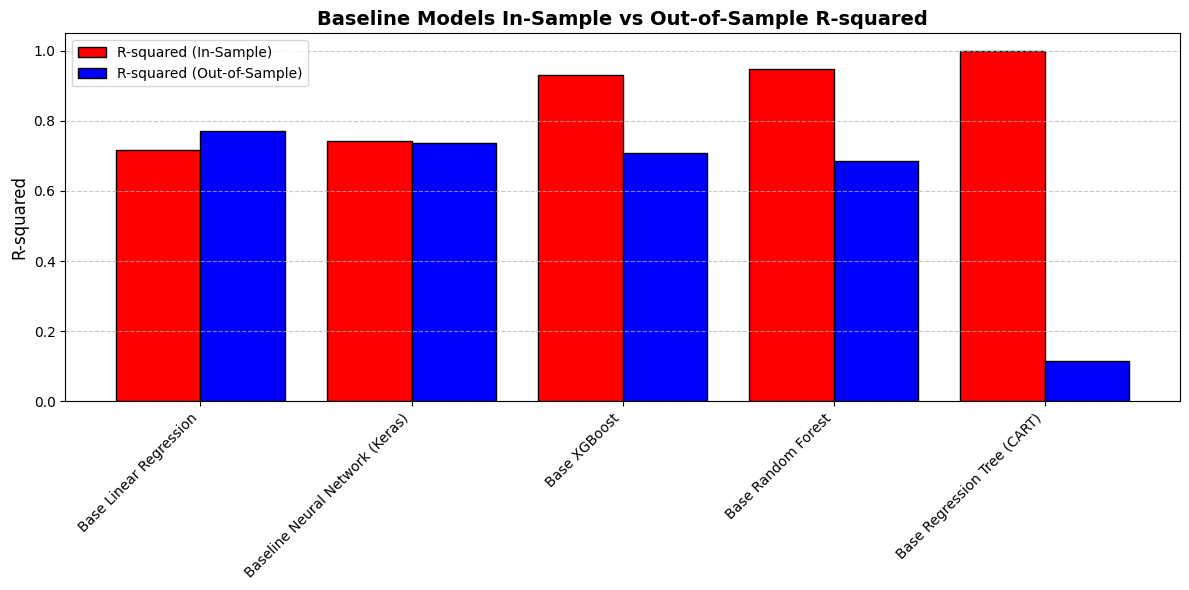

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract data for the bar chart
models = baseline_results['Model']
r2_in_sample = baseline_results['R-squared (In-Sample)']
r2_out_sample = baseline_results['R-squared (Out-of-Sample)']

# Set bar width and positions
bar_width = 0.4
x = np.arange(len(models))

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - bar_width/2, r2_in_sample,
       width=bar_width,
       label='R-squared (In-Sample)',
       color='red',
       edgecolor='black')  # Add black border
ax.bar(x + bar_width/2, r2_out_sample,
       width=bar_width,
       label='R-squared (Out-of-Sample)',
       color='blue',
       edgecolor='black')  # Add black border

# Add labels and title
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=10)
ax.set_ylabel('R-squared', fontsize=12)
ax.set_title('Baseline Models In-Sample vs Out-of-Sample R-squared', fontsize=14, weight='bold')
ax.legend(fontsize=10)

# Add grid lines for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show the chart
plt.tight_layout()
plt.show()


In [ ]:
!pip install ace_tools

In [ ]:
import statsmodels.api as sm
# Fit the linear regression model
model = sm.OLS(y_reg_train, X_reg_train).fit()

# Get the regression summary as a table
summary_table = model.summary2().tables[1]

# Display the table
import ace_tools as tools; tools.display_dataframe_to_user(name="Linear Regression Summary", dataframe=summary_table)


ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
tuned_results = evaluate_models(models_reg_ht, X_reg_train, X_reg_test, y_reg_train, y_reg_test)
tuned_results

,Model,R-squared (In-Sample),R-squared (Out-of-Sample),MSE (In-Sample),MSE (Out-of-Sample),MAE (In-Sample),MAE (Out-of-Sample)
5,ElasticNet (Bayes Optimization),0.716993,0.771363,4.352921,3.231797,0.501101,0.451400
3,Ridge Regression (L2),0.717145,0.771102,4.350576,3.235487,0.497073,0.448330
0,Random Search CV Linear Regression,0.717146,0.771082,4.350564,3.235778,0.496815,0.448112
4,Elastic Net Regression (L1-L2),0.704637,0.762265,4.542961,3.360408,0.648482,0.582173
8,XGBoost Hyperparameter Tuned,0.773955,0.750086,3.476792,3.532556,0.628070,0.676735
2,Lasso Regression (L1),0.682769,0.743614,4.879320,3.624032,0.831767,0.757354
1,Linear Recursive Feature Elimination,0.596616,0.654051,6.204442,4.890018,1.302186,1.202122
6,CART Hyperparameter Tuned,0.647877,0.635366,5.415989,5.154123,0.947398,1.237897
7,Random Forest Hyperparameter Tuned,0.530667,0.571155,7.218799,6.061751,1.589187,1.538849


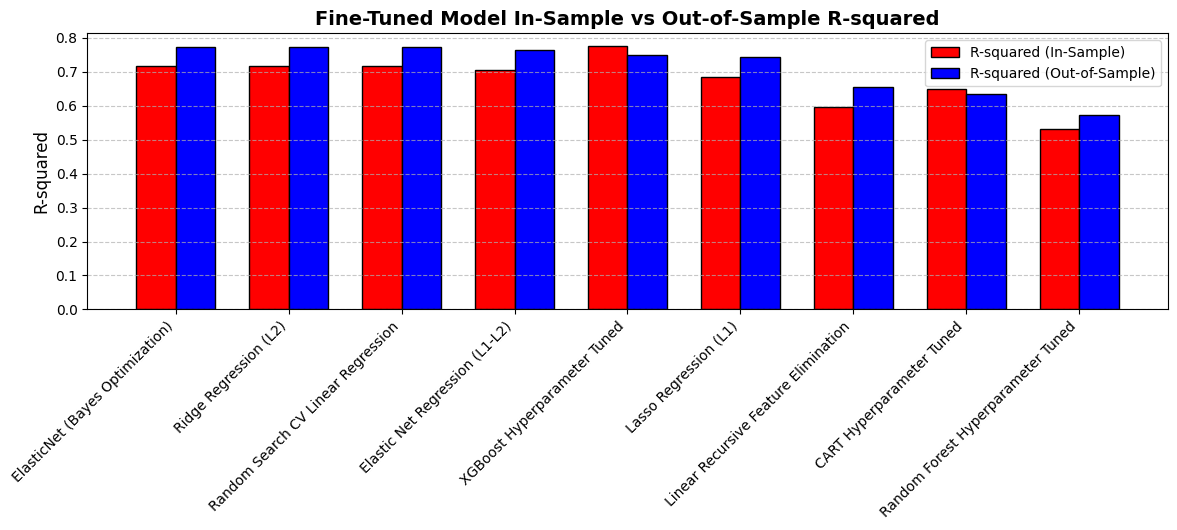

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract data for the bar chart
models = tuned_results['Model']
r2_in_sample = tuned_results['R-squared (In-Sample)']
r2_out_sample = tuned_results['R-squared (Out-of-Sample)']

# Set bar width and positions
bar_width = 0.35
x = np.arange(len(models))

# Adjust figure size based on the number of models
fig, ax = plt.subplots(figsize=(12, len(models) * 0.6))  # Dynamically adjust height
ax.bar(x - bar_width/2, r2_in_sample,
       width=bar_width,
       label='R-squared (In-Sample)',
       color='red',
       edgecolor='black')  # Red bars with black border
ax.bar(x + bar_width/2, r2_out_sample,
       width=bar_width,
       label='R-squared (Out-of-Sample)',
       color='blue',
       edgecolor='black')  # Blue bars with black border

# Add labels and title
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=10)
ax.set_ylabel('R-squared', fontsize=12)
ax.set_title('Fine-Tuned Model In-Sample vs Out-of-Sample R-squared', fontsize=14, weight='bold')
ax.legend(fontsize=10)

# Add grid lines for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show the chart
plt.tight_layout()
plt.show()


## Part 5b: Ensemble the Best Models (Regression)

In [ ]:
def create_ensembles_from_top_models(models_reg_ht, tuned_results, X_train, X_test, y_train, y_test):
    """
    Creates ensemble models using the top 5 models based on their out-of-sample R-squared metrics.

    Args:
        models_reg_ht (list): List of tuples containing model names and trained model objects.
        tuned_results (pd.DataFrame): DataFrame with evaluation metrics for all models, including out-of-sample R-squared.
        X_train (pd.DataFrame or np.ndarray): Training feature matrix.
        X_test (pd.DataFrame or np.ndarray): Testing feature matrix.
        y_train (pd.Series or np.ndarray): Training target values.
        y_test (pd.Series or np.ndarray): Testing target values.

    Returns:
        pd.DataFrame: Table of ensemble evaluation metrics (R-squared, MSE, MAE).
    """
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    import numpy as np
    import pandas as pd

    results = []

    # Ensure y_train and y_test are numpy arrays
    if isinstance(y_train, pd.Series):
        y_train = y_train.to_numpy()
    if isinstance(y_test, pd.Series):
        y_test = y_test.to_numpy()

    # Sort tuned_results DataFrame by R-squared (Out-of-Sample) descending
    top_models = tuned_results.sort_values(by="R-squared (Out-of-Sample)", ascending=False).head(5)

    # Extract model names and their corresponding trained models
    top_model_names = top_models["Model"].tolist()
    top_model_objects = [model for name, model in models_reg_ht if name in top_model_names]

    # Define ensembles
    ensemble_definitions = [
        (f"Ensemble 1 ({', '.join(top_model_names[:3])})", top_model_objects[:3]),
        (f"Ensemble 2 ({', '.join(top_model_names[1:4])})", top_model_objects[1:4]),
        (f"Ensemble 3 ({', '.join(top_model_names[2:5])})", top_model_objects[2:5]),
    ]

    # Evaluate each ensemble
    for ensemble_name, ensemble_models in ensemble_definitions:
        # Generate ensemble predictions by averaging predictions from the models
        y_train_ensemble_pred = np.mean(
            [model.predict(X_train) for model in ensemble_models], axis=0
        )
        y_test_ensemble_pred = np.mean(
            [model.predict(X_test) for model in ensemble_models], axis=0
        )

        # Compute metrics
        metrics = {
            "Ensemble": ensemble_name,
            "R-squared (In-Sample)": r2_score(y_train, y_train_ensemble_pred),
            "R-squared (Out-of-Sample)": r2_score(y_test, y_test_ensemble_pred),
            "MSE (In-Sample)": mean_squared_error(y_train, y_train_ensemble_pred),
            "MSE (Out-of-Sample)": mean_squared_error(y_test, y_test_ensemble_pred),
            "MAE (In-Sample)": mean_absolute_error(y_train, y_train_ensemble_pred),
            "MAE (Out-of-Sample)": mean_absolute_error(y_test, y_test_ensemble_pred),
        }
        results.append(metrics)

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)

    # Sort by out-of-sample R-squared for comparison
    results_df.sort_values(by="R-squared (Out-of-Sample)", ascending=False, inplace=True)

    return results_df


# Example usage:
# Assuming `models_reg_ht` contains the list of models with their names and trained objects
ensemble_results = create_ensembles_from_top_models(models_reg_ht, tuned_results, X_reg_train, X_reg_test, y_reg_train, y_reg_test)
ensemble_results


,Ensemble,R-squared (In-Sample),R-squared (Out-of-Sample),MSE (In-Sample),MSE (Out-of-Sample),MAE (In-Sample),MAE (Out-of-Sample)
0,"Ensemble 1 (ElasticNet (Bayes Optimization), R...",0.715741,0.771004,4.372172,3.236873,0.519597,0.464353
1,"Ensemble 2 (Ridge Regression (L2), Random Sear...",0.715457,0.770854,4.376543,3.238998,0.523900,0.468236
2,Ensemble 3 (Random Search CV Linear Regression...,0.740324,0.768093,3.994062,3.278019,0.540541,0.519192


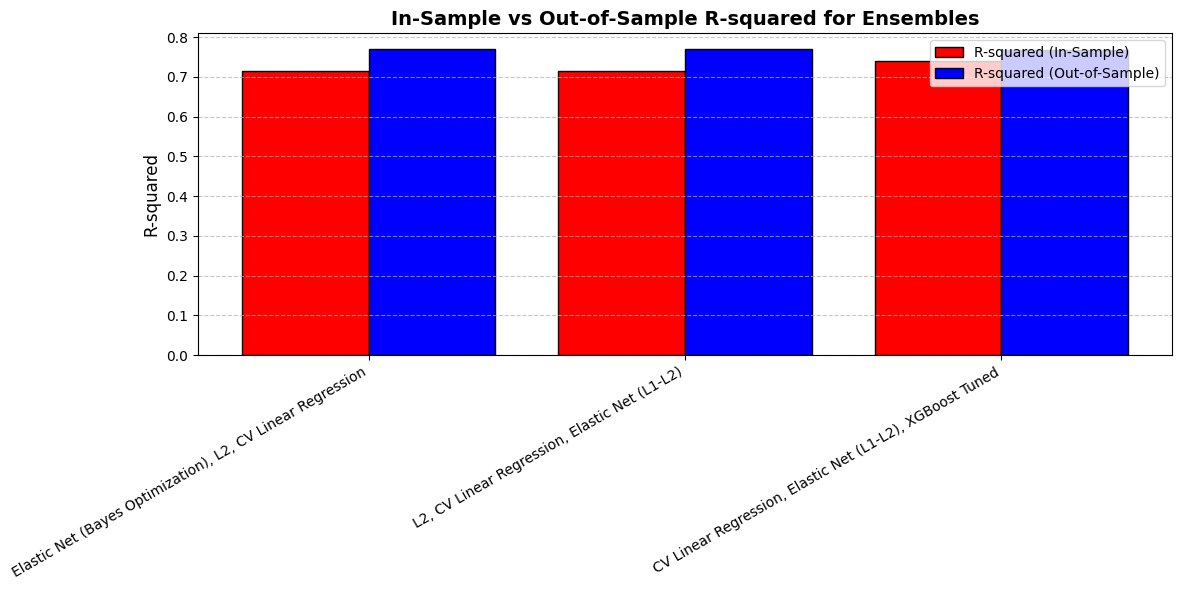

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract ensemble R-squared metrics from ensemble_results
r2_in_sample = ensemble_results['R-squared (In-Sample)']
r2_out_sample = ensemble_results['R-squared (Out-of-Sample)']

# Custom simplified names for the x-axis (adjusted to match 3 ensembles)
simplified_names = [
    "Elastic Net (Bayes Optimization), L2, CV Linear Regression",
    "L2, CV Linear Regression, Elastic Net (L1-L2)",
    "CV Linear Regression, Elastic Net (L1-L2), XGBoost Tuned"
]

# Ensure the number of labels matches the number of rows in ensemble_results
if len(simplified_names) != len(ensemble_results):
    raise ValueError(f"The number of x-axis labels ({len(simplified_names)}) does not match the number of ensembles ({len(ensemble_results)}).")

# Set bar width and positions
bar_width = 0.4
x = np.arange(len(simplified_names))

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - bar_width / 2, r2_in_sample,
       width=bar_width,
       label='R-squared (In-Sample)',
       color='red',
       edgecolor='black')  # Red bars with black border
ax.bar(x + bar_width / 2, r2_out_sample,
       width=bar_width,
       label='R-squared (Out-of-Sample)',
       color='blue',
       edgecolor='black')  # Blue bars with black border

# Add labels, title, and legend
ax.set_xticks(x)
ax.set_xticklabels(simplified_names, rotation=30, ha='right', fontsize=10)
ax.set_ylabel('R-squared', fontsize=12)
ax.set_title('In-Sample vs Out-of-Sample R-squared for Ensembles', fontsize=14, weight='bold')
ax.legend(fontsize=10)

# Add grid lines for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show the chart
plt.tight_layout()
plt.show()


# Part 6: Save Dataframes as Latex Tables

In [ ]:
from tabulate import tabulate

def display_dataframe_as_markdown(df, tablefmt="github"):
    """
    Displays a DataFrame as a formatted Markdown table in a Jupyter Notebook.

    Args:
        df (pd.DataFrame): The DataFrame to render.
        tablefmt (str): The tabulate formatting style (default: "github").

    Returns:
        None: Outputs a Markdown-formatted table.
    """
    markdown_table = tabulate(df, headers='keys', tablefmt=tablefmt, showindex=False)
    print(f"```\n{markdown_table}\n```")

# Example usage:
# Assume you have a DataFrame `results_df`
base_download = display_dataframe_as_markdown(baseline_results, tablefmt="fancy_grid")



```
╒═════════════════════════════════╤═════════════════════════╤═════════════════════════════╤═══════════════════╤═══════════════════════╤═══════════════════╤═══════════════════════╕
│ Model                           │   R-squared (In-Sample) │   R-squared (Out-of-Sample) │   MSE (In-Sample) │   MSE (Out-of-Sample) │   MAE (In-Sample) │   MAE (Out-of-Sample) │
╞═════════════════════════════════╪═════════════════════════╪═════════════════════════════╪═══════════════════╪═══════════════════════╪═══════════════════╪═══════════════════════╡
│ Base Linear Regression          │                0.717146 │                    0.771082 │          4.35056  │               3.23578 │          0.496815 │              0.448112 │
├─────────────────────────────────┼─────────────────────────┼─────────────────────────────┼───────────────────┼───────────────────────┼───────────────────┼───────────────────────┤
│ Baseline Neural Network (Keras) │                0.741982 │                    0.709736 │     

In [ ]:
tune_download = display_dataframe_as_markdown(tuned_results, tablefmt="fancy_grid")

```
╒══════════════════════════════════════╤═════════════════════════╤═════════════════════════════╤═══════════════════╤═══════════════════════╤═══════════════════╤═══════════════════════╕
│ Model                                │   R-squared (In-Sample) │   R-squared (Out-of-Sample) │   MSE (In-Sample) │   MSE (Out-of-Sample) │   MAE (In-Sample) │   MAE (Out-of-Sample) │
╞══════════════════════════════════════╪═════════════════════════╪═════════════════════════════╪═══════════════════╪═══════════════════════╪═══════════════════╪═══════════════════════╡
│ ElasticNet (Bayes Optimization)      │                0.716993 │                    0.771363 │           4.35292 │               3.2318  │          0.501101 │              0.4514   │
├──────────────────────────────────────┼─────────────────────────┼─────────────────────────────┼───────────────────┼───────────────────────┼───────────────────┼───────────────────────┤
│ Ridge Regression (L2)                │                0.717145 │     

In [ ]:
ensemble_download = display_dataframe_as_markdown(ensemble_results, tablefmt="fancy_grid")

```
╒═══════════════════════════════════════════════════════════════════════════════════════════════════════════════╤═════════════════════════╤═════════════════════════════╤═══════════════════╤═══════════════════════╤═══════════════════╤═══════════════════════╕
│ Ensemble                                                                                                      │   R-squared (In-Sample) │   R-squared (Out-of-Sample) │   MSE (In-Sample) │   MSE (Out-of-Sample) │   MAE (In-Sample) │   MAE (Out-of-Sample) │
╞═══════════════════════════════════════════════════════════════════════════════════════════════════════════════╪═════════════════════════╪═════════════════════════════╪═══════════════════╪═══════════════════════╪═══════════════════╪═══════════════════════╡
│ Ensemble 1 (ElasticNet (Bayes Optimization), Ridge Regression (L2), Random Search CV Linear Regression)       │                0.715741 │                    0.771004 │           4.37217 │               3.23687 │         

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

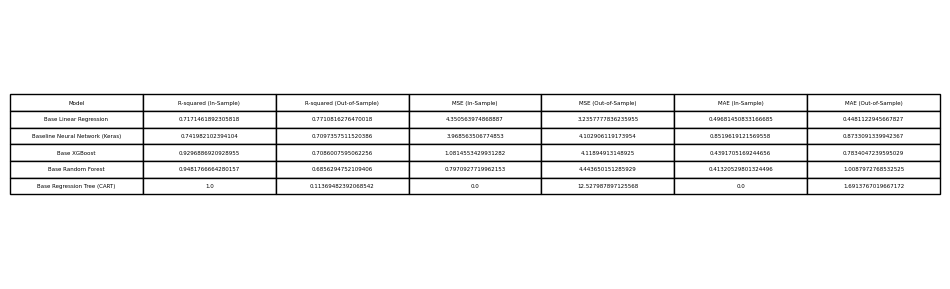

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files

# Save the DataFrame as an image
fig, ax = plt.subplots(figsize=(12, len(baseline_results) * 0.5 + 1))  # Adjust height for rows
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=baseline_results.values, colLabels=baseline_results.columns, cellLoc='center', loc='center')
fig.savefig("table_output.png", dpi=300)

# Download the PNG file
files.download("table_output.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

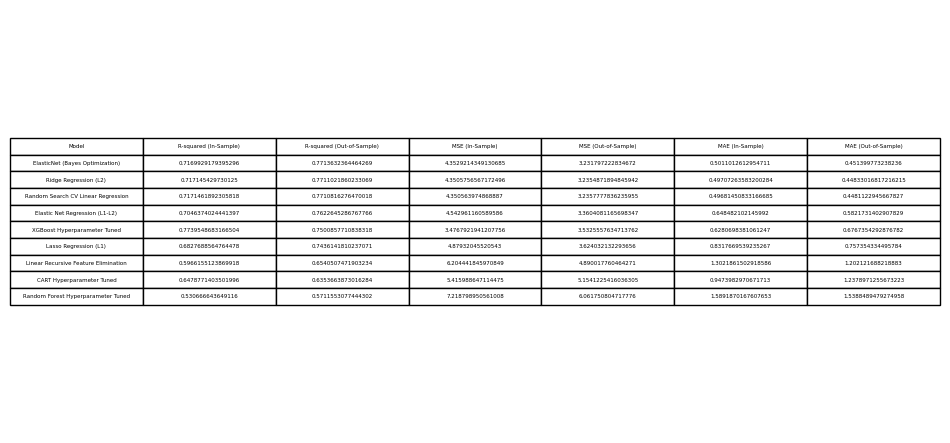

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files

# Save the DataFrame as an image
fig, ax = plt.subplots(figsize=(12, len(tuned_results) * 0.5 + 1))  # Adjust height for rows
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=tuned_results.values, colLabels=tuned_results.columns, cellLoc='center', loc='center')
fig.savefig("table_output.png", dpi=300)

# Download the PNG file
files.download("table_output.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

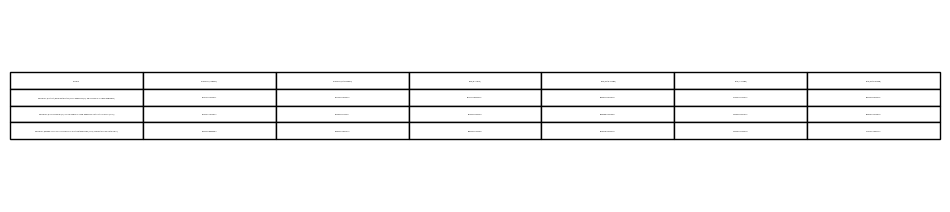

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files

# Save the DataFrame as an image
fig, ax = plt.subplots(figsize=(12, len(ensemble_results) * 0.5 + 1))  # Adjust height for rows
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=ensemble_results.values, colLabels=ensemble_results.columns, cellLoc='center', loc='center')
fig.savefig("table_output.png", dpi=300)

# Download the PNG file
files.download("table_output.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

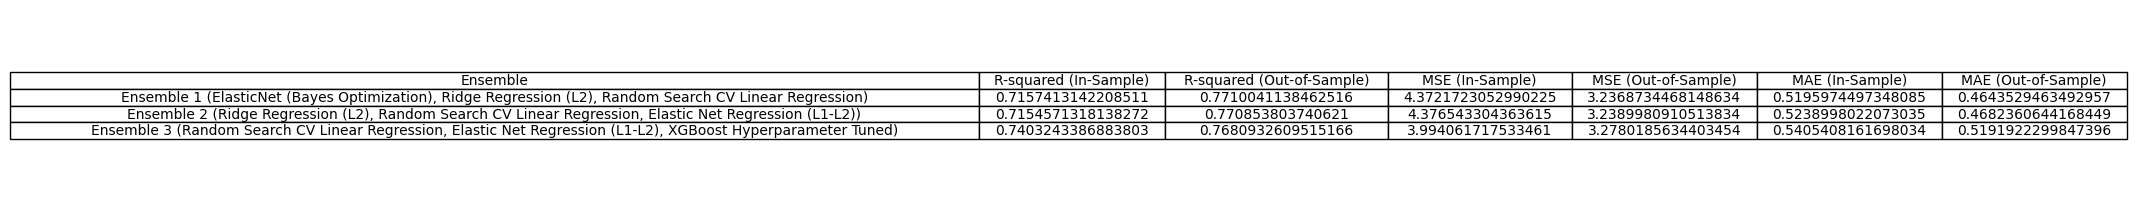

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files

# Save the DataFrame as an image with adjusted text size
fig, ax = plt.subplots(figsize=(12, len(ensemble_results) * 0.5 + 1))  # Adjust height for rows
ax.axis('tight')
ax.axis('off')

# Create the table with adjusted font size
table = ax.table(cellText=ensemble_results.values,
                 colLabels=ensemble_results.columns,
                 cellLoc='center',
                 loc='center')
table.auto_set_font_size(False)  # Disable automatic font scaling
table.set_fontsize(10)  # Adjust to a smaller, balanced font size
table.auto_set_column_width(col=list(range(len(ensemble_results.columns))))  # Adjust column widths

# Save as PNG
fig.savefig("table_output.png", dpi=300)

# Download the PNG file
files.download("table_output.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

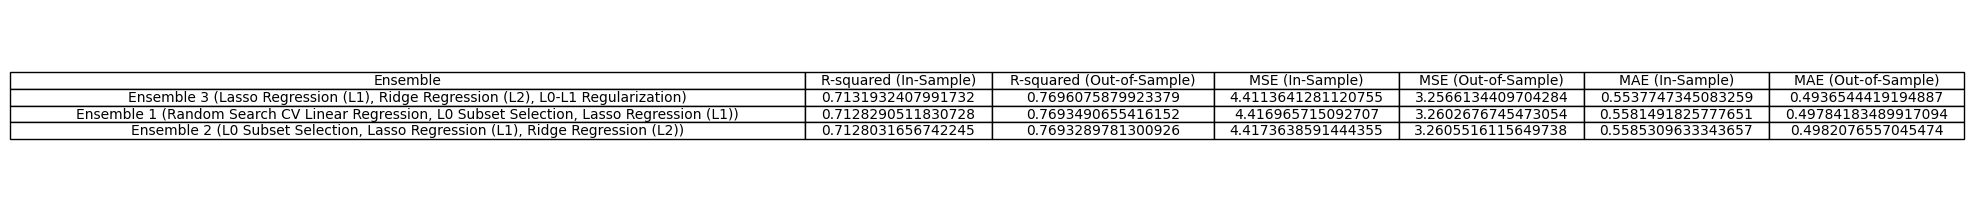

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files

# Adjust the DataFrame table as an image with text wrapping
fig, ax = plt.subplots(figsize=(12, len(ensemble_results) * 0.5 + 1))  # Adjust height for rows
ax.axis('tight')
ax.axis('off')

# Wrap cell text to fit within the table
wrapped_cell_text = [[f"{str(cell):<30}" if len(str(cell)) > 30 else str(cell) for cell in row] for row in ensemble_results.values]

# Create the table
table = ax.table(cellText=wrapped_cell_text,
                 colLabels=ensemble_results.columns,
                 cellLoc='center',
                 loc='center')
table.auto_set_font_size(False)  # Disable automatic font scaling
table.set_fontsize(10)  # Adjust font size
table.auto_set_column_width(col=list(range(len(ensemble_results.columns))))  # Adjust column widths

# Save as PNG
fig.savefig("table_output.png", dpi=300)

# Download the PNG file
files.download("table_output.png")
